In [1]:
'''
Doob decomposition for GBM
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use("ggplot")


In [2]:
'''
Geometric Brownian Motion
(from Wikipedia)

dS_t = mu * S_t dt + sigma * S_t * dW_t

Analytical solution
log( S_t / S_0 )  = (mu - sigma^2 / 2) * t + sigma * W_t

'''
np.random.seed()

T  = 60        # Number of months to simulate

# Annual rates
ave_annual_mu = 0.08      # Annual average return
ave_annual_sigma = 0.15   # Annual average volatility

# Monthly rates
mu = ave_annual_mu / 12  # monthly
sigma = ave_annual_sigma / np.sqrt(12)

S0 = 100  # Initial stock price


time_series = np.arange(T + 1)
stock_prices = np.zeros(T + 1)
stock_prices[0] = S0

for t in range(1, T + 1):
    stock_prices[t] = stock_prices[t - 1] * ( 1 + mu + sigma * np.random.normal() )



In [3]:
'''
Derive Doob decomposition using forecast / surprise method
Verify the Doob theorem.
'''

# Observed process
X = stock_prices
dX = np.zeros(X.shape)
for t in range(1, T + 1):
    dX[t] = X[t] - X[t-1]

# Forecast change:
#     dF[t] = E{ X[t] | X[t-1] } - X[t-1]
#           = X[t - 1] * ( 1 + mu  ) - X[t-1]
#           = X[t - 1] * ( mu )
dF = np.zeros(T + 1)
for t in range(1, T + 1):
    dF[t] = X[t-1] * ( mu )

# Surprise:
#     dS[t] = X[t] - E{ X[t] | X[t-1] }
#           = X[t] - X[t - 1] * ( 1 + mu * dt )
dS = np.zeros(T + 1)
for t in range(1, T + 1):
    dS[t] = X[t] - X[t - 1] * ( 1 + mu )


# Martingale and predictive process are cumulative sums

# Martingale is a sequence of random variables for which, at a particular time,
# the conditional expectation of the next value in the sequence is equal to the
# present value, regardless of all prior values.

M = np.cumsum(dS) + S0 # Cumulative sum of what I got minus what I could get starting with 100
A = np.cumsum(dF) # Cumulative sum of what I predict

# Verify Doob theorem
#    X = A + M
error = X - (A + M)
print("Max absolute error in X = A + M to twelve digits: {:16.12f}".format(np.max(np.abs(error))) )

Max absolute error in X = A + M to twelve digits:   0.000000000001


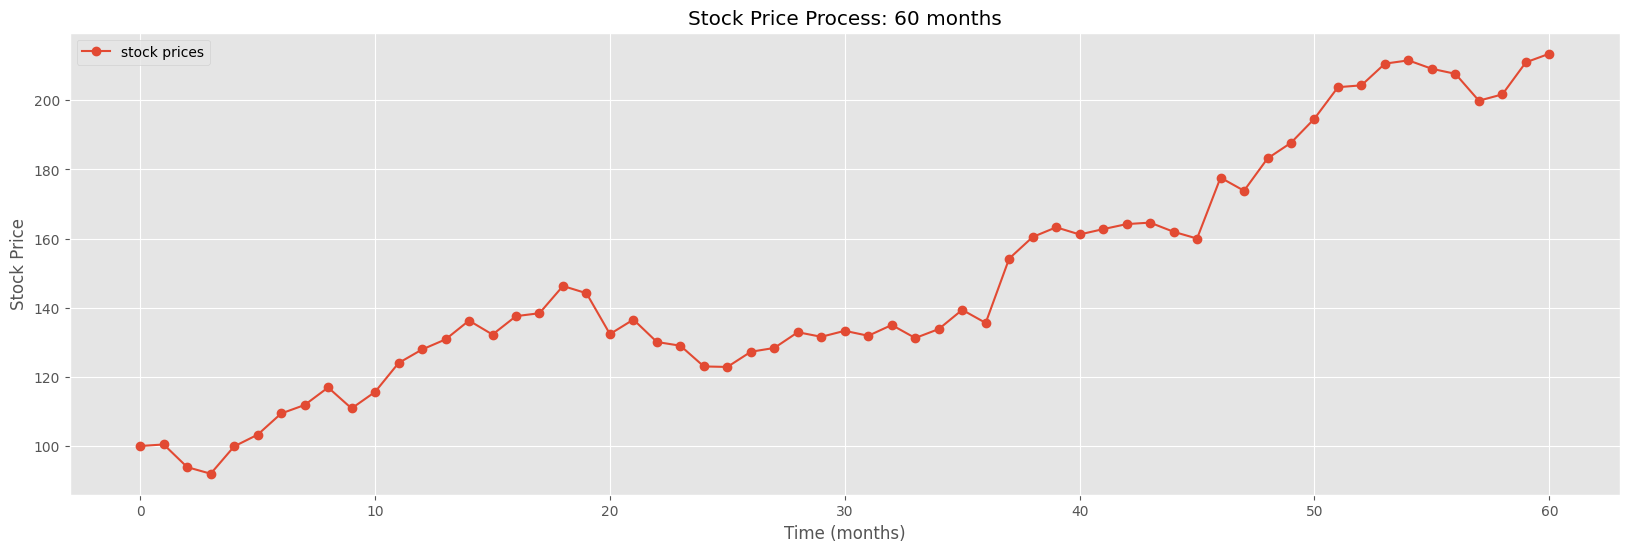

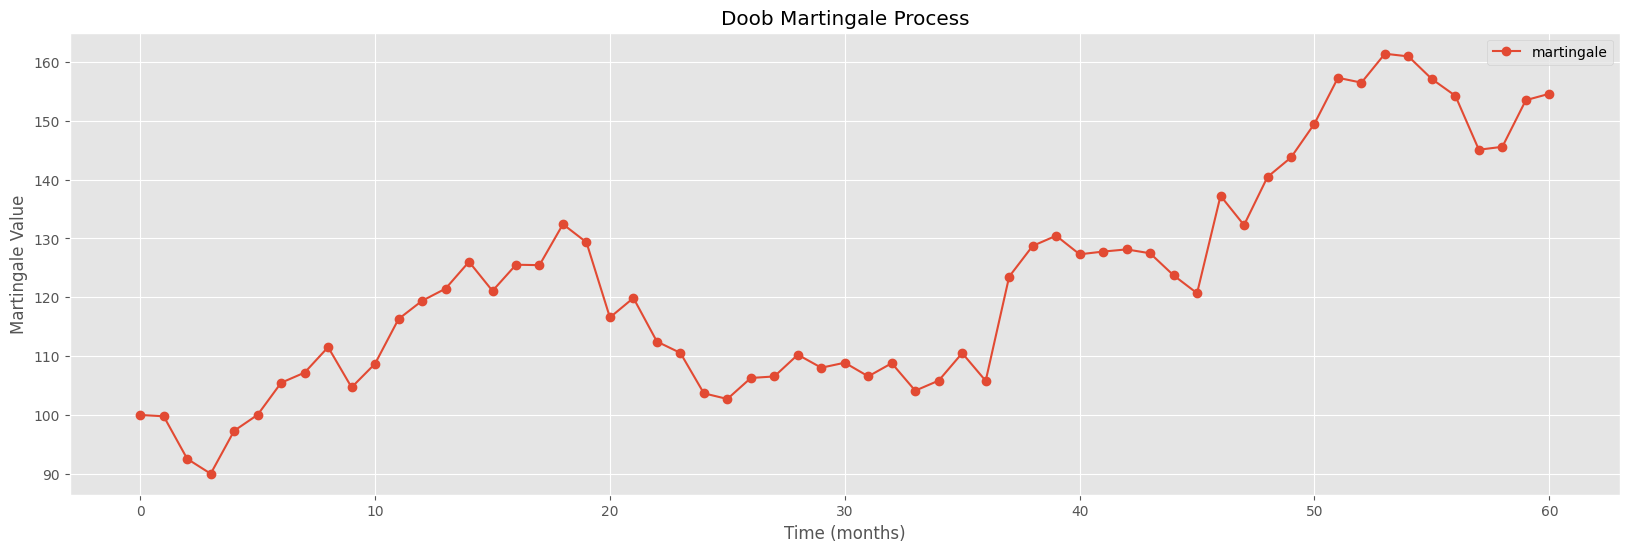

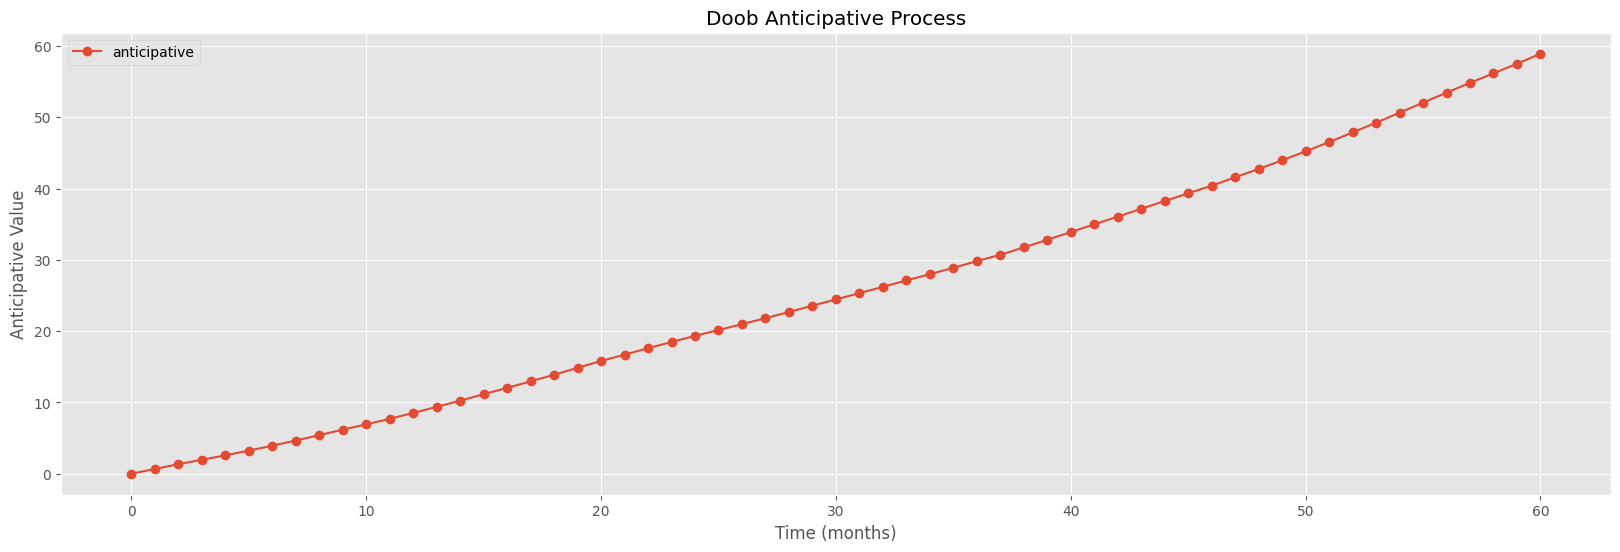

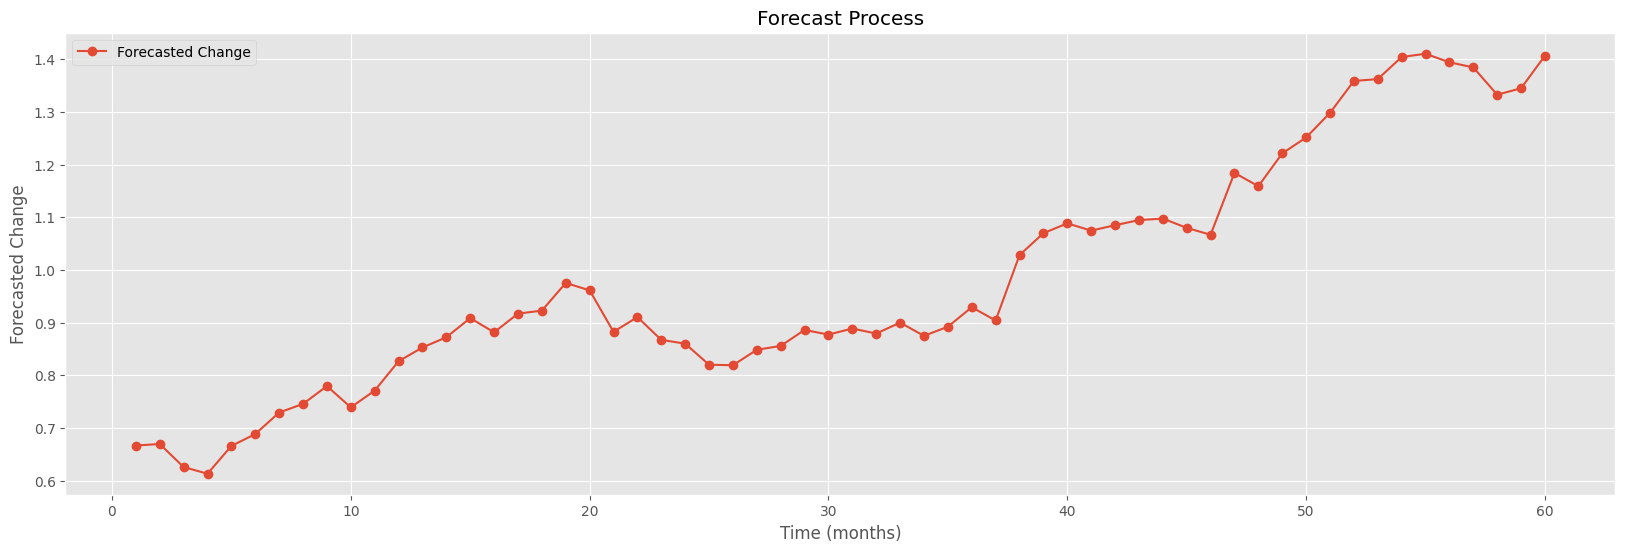

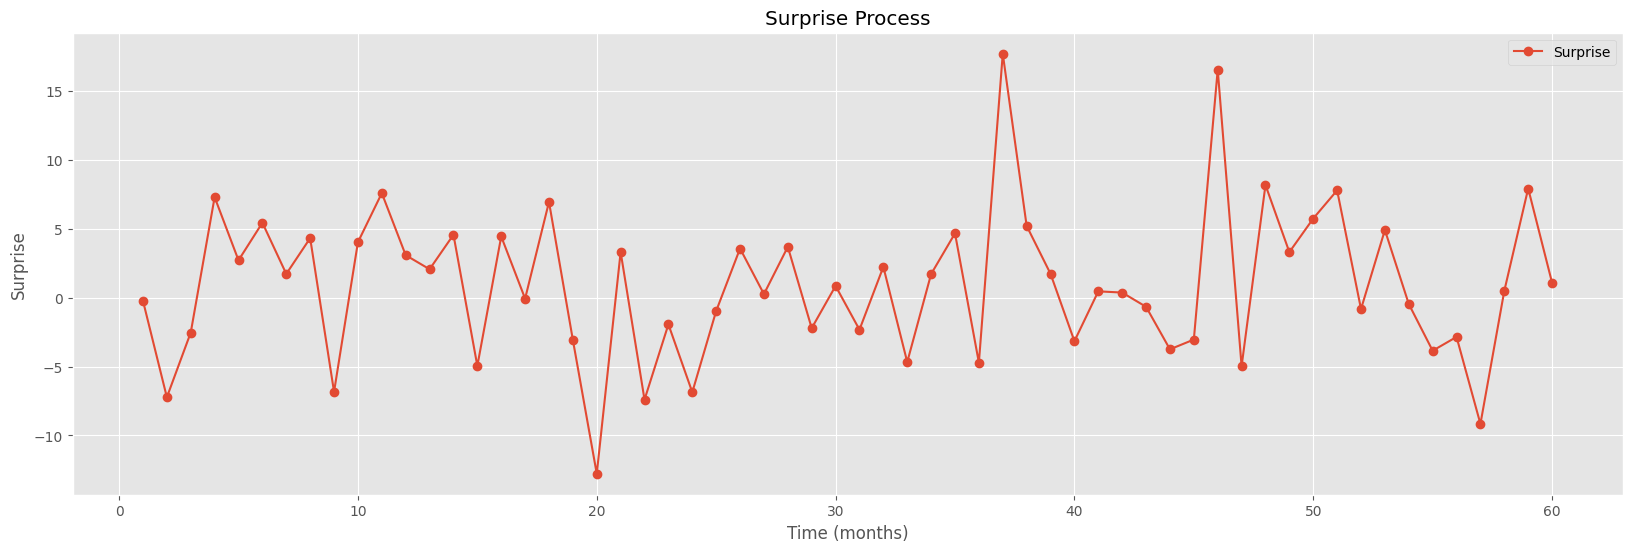

In [4]:
'''
Plots
'''

decomp_df = pd.DataFrame({"Actual": X, "Martingale": M, "Anticipative": A}, index=time_series)
forecast_surpise_df = pd.DataFrame({"change": dX[1:], "forecast": dF[1:], "surprise": dS[1:]}, index=time_series[1:])

# plot_series(decomp_df['Actual'], labels=['stock prices'], title="Stock Price Process: 60 months")
plt.figure(figsize=(20, 6))
plt.plot(decomp_df.index, decomp_df['Actual'], label='stock prices', marker='o')
plt.title("Stock Price Process: 60 months")
plt.xlabel("Time (months)")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# plot_series(decomp_df['Martingale'], labels=['martingale'], title="Doob Martingale Process")
plt.figure(figsize=(20, 6))
plt.plot(decomp_df.index, decomp_df['Martingale'], label='martingale', marker='o')
plt.title("Doob Martingale Process")
plt.xlabel("Time (months)")
plt.ylabel("Martingale Value")
plt.legend()
plt.show()

# plot_series(decomp_df['Anticipative'], labels=['anticipative'], title="Doob Anticipative Process")
plt.figure(figsize=(20, 6))
plt.plot(decomp_df.index, decomp_df['Anticipative'], label='anticipative', marker='o')
plt.title("Doob Anticipative Process")
plt.xlabel("Time (months)")
plt.ylabel("Anticipative Value")
plt.legend()
plt.show()

# plot_series(forecast_surpise_df['forecast'], labels=['Forecasted Change'], title="Forecast Process")
plt.figure(figsize=(20, 6))
plt.plot(forecast_surpise_df.index, forecast_surpise_df['forecast'], label='Forecasted Change', marker='o')
plt.title("Forecast Process")
plt.xlabel("Time (months)")
plt.ylabel("Forecasted Change")
plt.legend()
plt.show()

# plot_series(forecast_surpise_df['surprise'], labels=['Surprise'], title="Surprise Process" )
plt.figure(figsize=(20, 6))
plt.plot(forecast_surpise_df.index, forecast_surpise_df['surprise'], label='Surprise', marker='o')
plt.title("Surprise Process")
plt.xlabel("Time (months)")
plt.ylabel("Surprise")
plt.legend()
plt.show()



*   **change**: Increase compared to previous value
*   **forecast**: How much I expect to change at best
*   **surprise**: How much has changed minus my prediction



# **Example with two correlated Geometric Brownian Processes**

In [5]:
# Initial stock price
Stock1_0 = 100
Stock2_0 = 100

# Monthly rates
mu_1 = 0.08 / 12
mu_2 = 0.06 / 12

# Monthly volatility
sigma_1 = 0.15 / np.sqrt(12)
sigma_2 = 0.25 / np.sqrt(12)

# Time
T = 60

# Correlation value
rho = 0.1

In [6]:
time_series = np.arange(T + 1)

stock_prices_1 = np.zeros(T + 1)
stock_prices_2 = np.zeros(T + 1)

stock_prices_1[0] = Stock1_0
stock_prices_2[0] = Stock2_0

## **Price generation**

reference: https://math.stackexchange.com/questions/4361928/how-to-model-2-correlated-geometric-brownian-motions

In [7]:
for t in range(1, T + 1):
  B_1 = np.random.normal()
  B_2 = np.random.normal()
  stock_prices_1[t] = stock_prices_1[t - 1] * ( 1 + mu_1 + sigma_1 * B_1 )
  stock_prices_2[t] = stock_prices_2[t - 1] * ( 1 + mu_2 + sigma_2 * (rho * B_1 + np.sqrt(1 - rho**2) * B_2 ))

## **Forecast**

In [8]:
dF_series_1 = np.zeros(T + 1)
dF_series_2 = np.zeros(T + 1)
for t in range(1, T + 1):
    dF_series_1[t] = stock_prices_1[t - 1] * mu_1
    dF_series_2[t] = stock_prices_2[t - 1] * mu_2

## **Compute surprise**

In [9]:
dS_series_1 = np.zeros(T + 1)
dS_series_2 = np.zeros(T + 1)
for t in range(1, T + 1):
    dS_series_1[t] = stock_prices_1[t] - stock_prices_1[t - 1] * (1 + mu_1)
    dS_series_2[t] = stock_prices_2[t] - stock_prices_2[t - 1] * (1 + mu_2)

np.corrcoef(dS_series_1, dS_series_2)

array([[1.        , 0.09365571],
       [0.09365571, 1.        ]])

## **Doob theorem**

In [10]:
M_1 = np.cumsum(dS_series_1) + Stock1_0 # Cumulative sum of what I got minus what I could get starting with 100
A_1 = np.cumsum(dF_series_1) # Cumulative sum of what I predict

# Doob theorem for stock 1
error = stock_prices_1 - (A_1 + M_1)
print("Max absolute error in stock 1 = A + M to twelve digits: {:16.12f}".format(np.max(np.abs(error))) )

M_2 = np.cumsum(dS_series_2) + Stock2_0 # Cumulative sum of what I got minus what I could get starting with 100
A_2 = np.cumsum(dF_series_2) # Cumulative sum of what I predict

# Doob theorem for stock 2
error = stock_prices_2 - (A_2 + M_2)
print("Max absolute error in stock 2 = A + M to twelve digits: {:16.12f}".format(np.max(np.abs(error))) )

decomp_df = pd.DataFrame({"Actual Stock 1": stock_prices_1, "Martingale Stock 1": M_1, "Anticipative Stock 1": A_1,
                          "Actual Stock 2": stock_prices_2, "Martingale Stock 2": M_2, "Anticipative Stock 2": A_2}, index=time_series)

Max absolute error in stock 1 = A + M to twelve digits:   0.000000000000
Max absolute error in stock 2 = A + M to twelve digits:   0.000000000001


## **Plots**

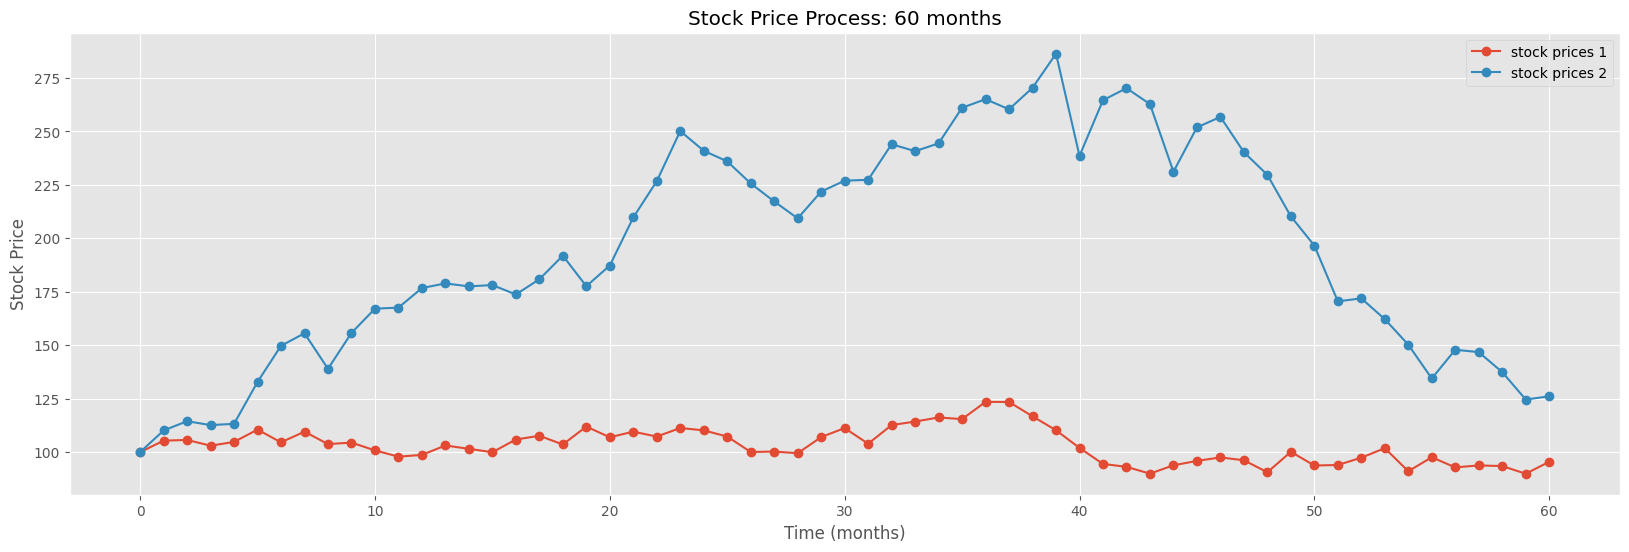

In [11]:
# plot_series(decomp_df['Actual'], labels=['stock prices'], title="Stock Price Process: 60 months")
plt.figure(figsize=(20, 6))
plt.plot(decomp_df.index, decomp_df['Actual Stock 1'], label='stock prices 1', marker='o')
plt.plot(decomp_df.index, decomp_df['Actual Stock 2'], label='stock prices 2', marker='o')
plt.title("Stock Price Process: 60 months")
plt.xlabel("Time (months)")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

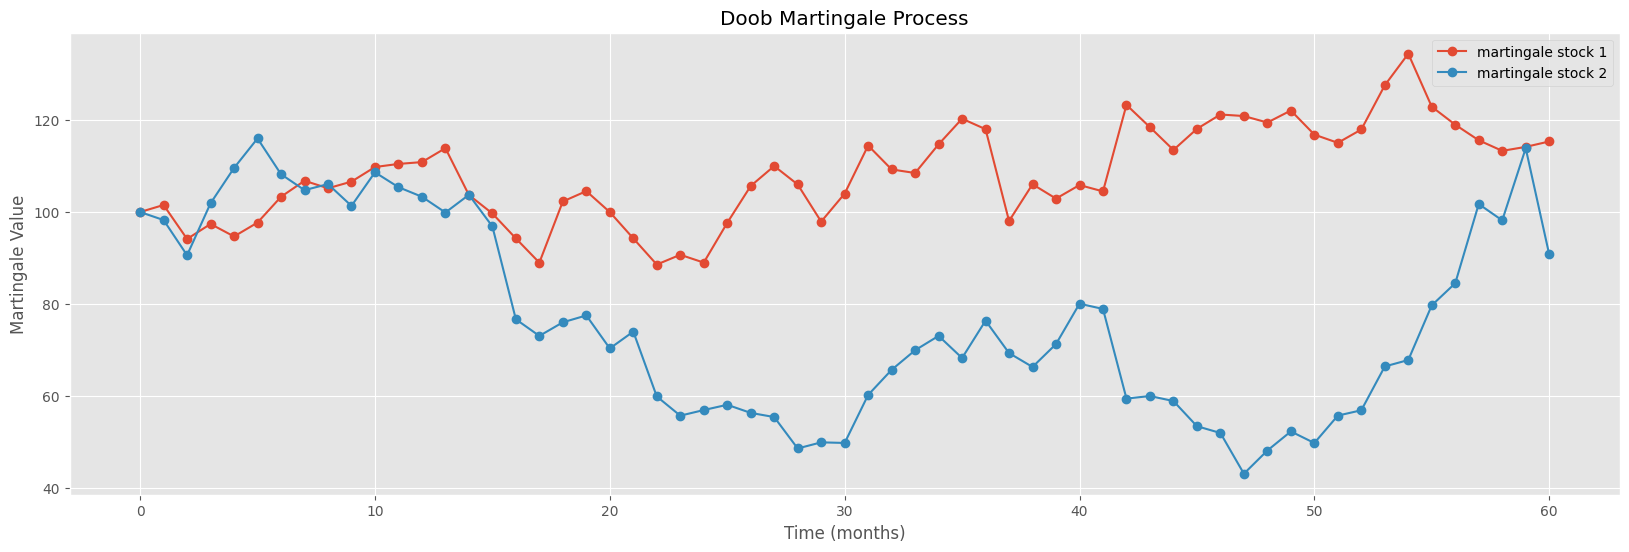

In [166]:
# plot_series(decomp_df['Martingale'], labels=['martingale'], title="Doob Martingale Process")
plt.figure(figsize=(20, 6))
plt.plot(decomp_df.index, decomp_df['Martingale Stock 1'], label='martingale stock 1', marker='o')
plt.plot(decomp_df.index, decomp_df['Martingale Stock 2'], label='martingale stock 2', marker='o')
plt.title("Doob Martingale Process")
plt.xlabel("Time (months)")
plt.ylabel("Martingale Value")
plt.legend()
plt.show()

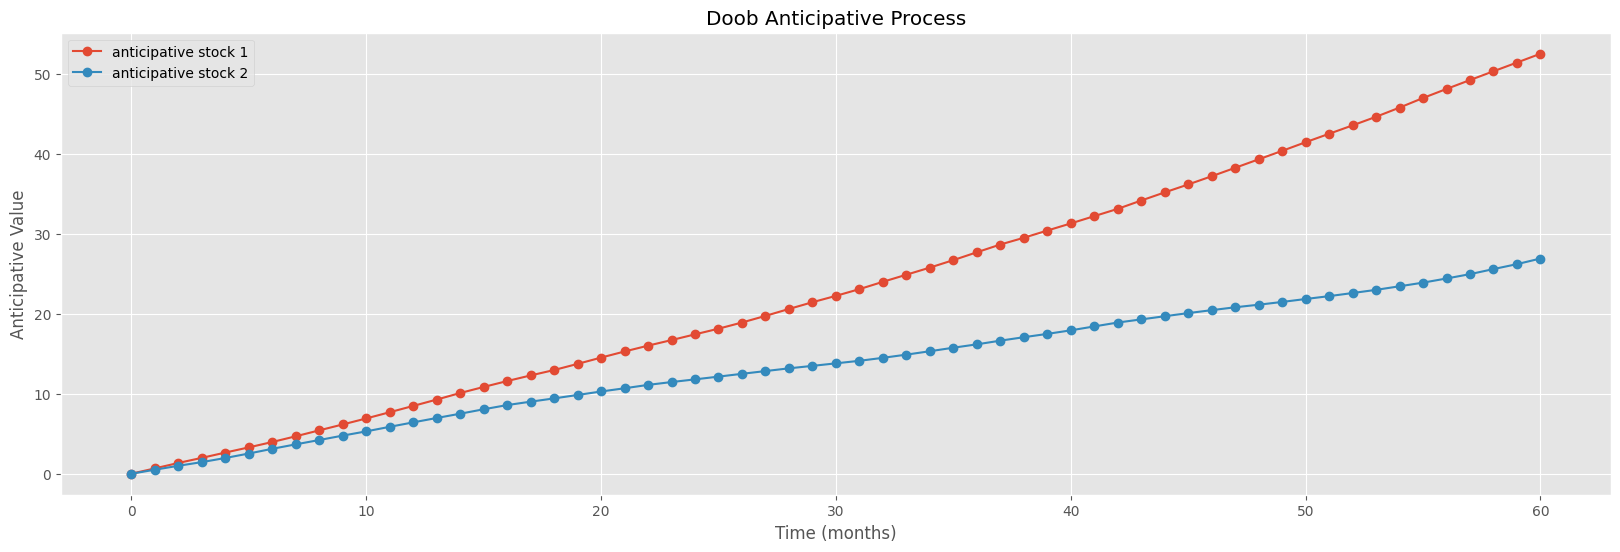

In [167]:
# plot_series(decomp_df['Anticipative'], labels=['anticipative'], title="Doob Anticipative Process")
plt.figure(figsize=(20, 6))
plt.plot(decomp_df.index, decomp_df['Anticipative Stock 1'], label='anticipative stock 1', marker='o')
plt.plot(decomp_df.index, decomp_df['Anticipative Stock 2'], label='anticipative stock 2', marker='o')
plt.title("Doob Anticipative Process")
plt.xlabel("Time (months)")
plt.ylabel("Anticipative Value")
plt.legend()
plt.show()

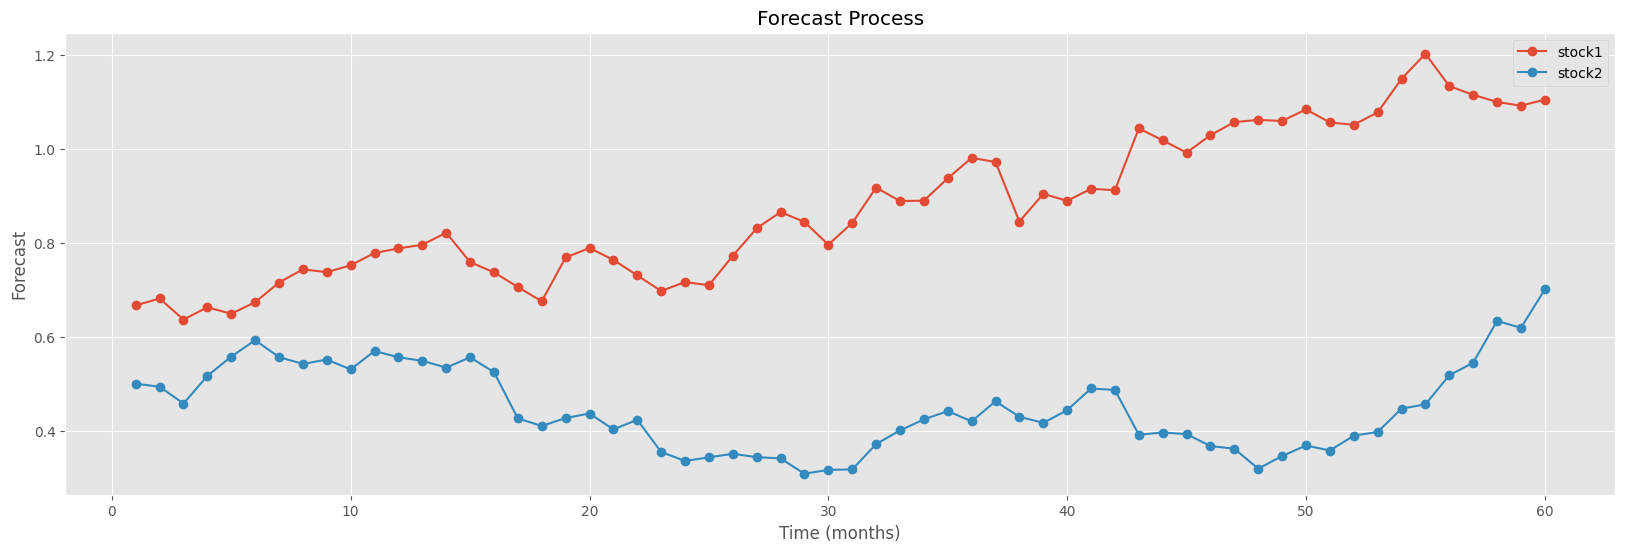

In [168]:
forecast_df = pd.DataFrame({"stock1": dF_series_1[1:], "stock2": dF_series_2[1:]}, index=time_series[1:])

plt.figure(figsize=(20, 6))
plt.plot(forecast_df.index, forecast_df['stock1'], label='stock1', marker='o')
plt.plot(forecast_df.index, forecast_df['stock2'], label='stock2', marker='o')
plt.title("Forecast Process")
plt.xlabel("Time (months)")
plt.ylabel("Forecast")
plt.legend()
plt.show()

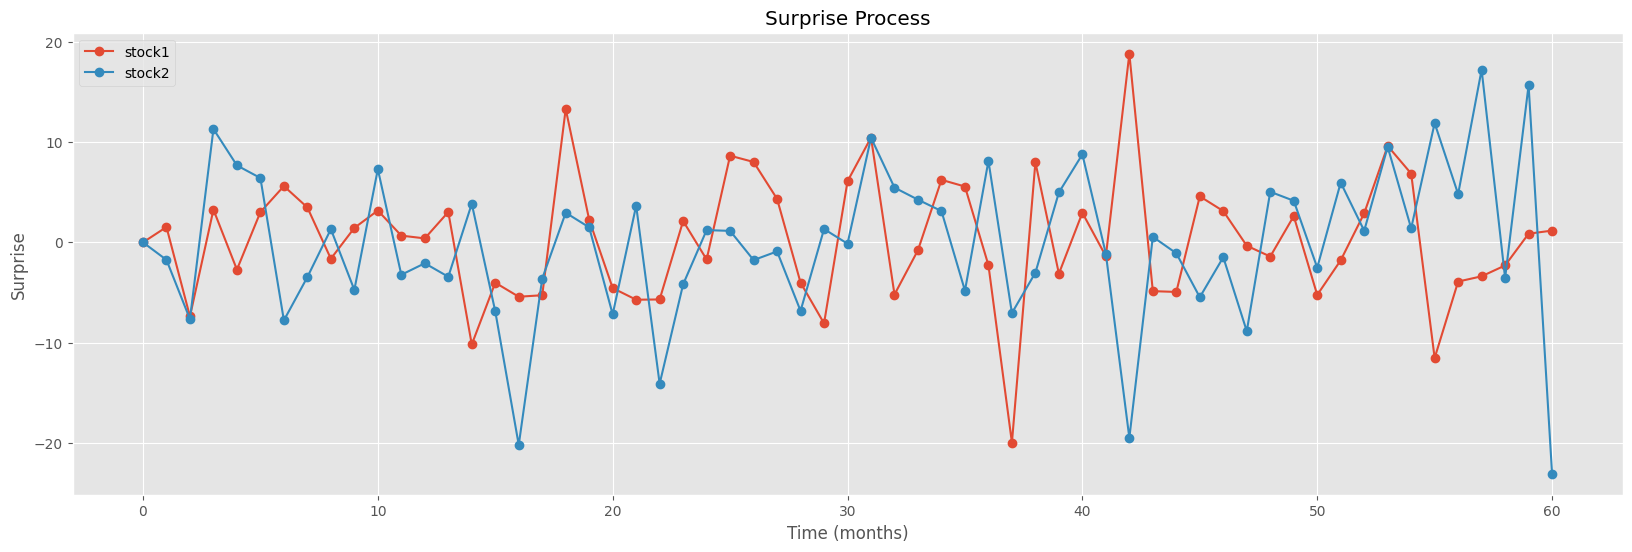

In [169]:
surprise_df = pd.DataFrame({"stock1": dS_series_1, "stock2": dS_series_2}, index=time_series)

plt.figure(figsize=(20, 6))
plt.plot(surprise_df.index, surprise_df['stock1'], label='stock1', marker='o')
plt.plot(surprise_df.index, surprise_df['stock2'], label='stock2', marker='o')
plt.title("Surprise Process")
plt.xlabel("Time (months)")
plt.ylabel("Surprise")
plt.legend()
plt.show()